# Packages

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading the data
I have used the data at this link: https://www.kaggle.com/datasets/rifkaregmi/branded-cars-dataset?resource=download

In [2]:
df = pd.read_csv("Automobile data.csv")
df.head()

,Brand Name,Fuel type,Aspiration,Door Panel,Design,Wheel Drive,Engine Location,Engine Type,Cylinder Count,Engine Size,Fuel System,Bore,Stroke,Compression Ratio,Horse Power,Top-RPM,City Mileage,Highway Mileage,Price in Dollars
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Preprocessing

In [3]:
# Seperate categorical and numerical data
df_categorical = pd.DataFrame()

i = 0
while i < df.shape[1]:
    if df.iloc[:,i].dtype == "object":
        index = np.asarray(df_categorical).shape[1]
        df_categorical.insert(index, df.columns[i], df.iloc[:, i])
        df = df.drop(df.columns[i], axis=1)
    else:
        i += 1

In [4]:
df_categorical.head()

,Brand Name,Fuel type,Aspiration,Door Panel,Design,Wheel Drive,Engine Location,Engine Type,Cylinder Count,Fuel System
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [5]:
df_numerical = df
df_numerical.head()

,Engine Size,Bore,Stroke,Compression Ratio,Horse Power,Top-RPM,City Mileage,Highway Mileage,Price in Dollars
0,130,3.47,2.68,9.0,111,5000,21,27,13495
1,130,3.47,2.68,9.0,111,5000,21,27,16500
2,152,2.68,3.47,9.0,154,5000,19,26,16500
3,109,3.19,3.40,10.0,102,5500,24,30,13950
4,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
# Convert categorical data into one-hot encoded version
ohe = OneHotEncoder(sparse_output=False)
ohe_data = ohe.fit_transform(df_categorical)

In [7]:
ohe.categories_

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
        'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object),
 array(['diesel', 'gas'], dtype=object),
 array(['std', 'turbo'], dtype=object),
 array(['?', 'four', 'two'], dtype=object),
 array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
       dtype=object),
 array(['4wd', 'fwd', 'rwd'], dtype=object),
 array(['front', 'rear'], dtype=object),
 array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
 array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
       dtype=object),
 array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
       dtype=object)]

In [8]:
# X and y of numerical data only
X, y_temp = df_numerical.iloc[:, :-1], df_numerical.iloc[:, -1]
y = np.asarray(y_temp).reshape(-1, 1)

In [9]:
# Data scaling
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

In [10]:
# Concatenate scaled numerical data with one-hot encoded categorical data
X = np.concatenate([X, ohe_data], axis=1)

In [11]:
# Generating the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, train_size=0.5)

# Principal Component Analysis

In [12]:
train_pca = PCA(n_components=2).fit_transform(X_train)
cv_pca = PCA(n_components=2).fit_transform(X_cv)
test_pca = PCA(n_components=2).fit_transform(X_test)

# Data Visualization

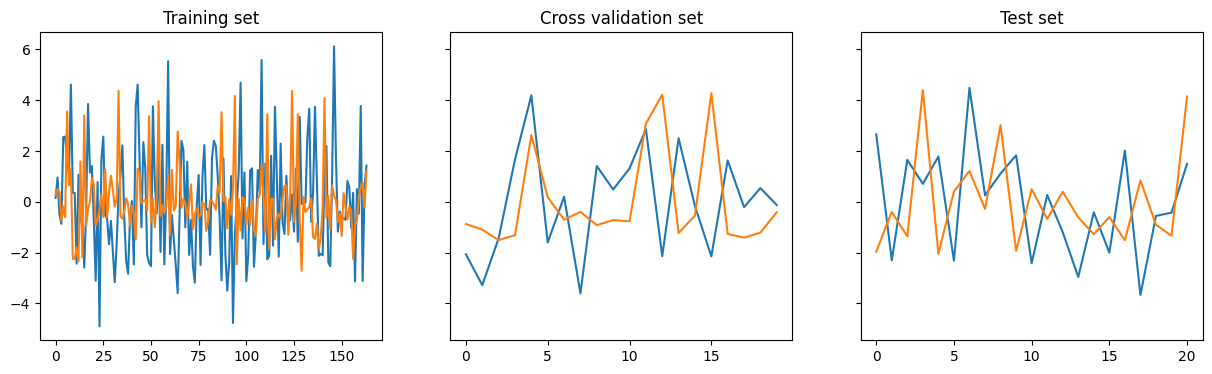

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,4))
ax1.plot(train_pca)
ax1.set_title("Training set")
ax2.plot(cv_pca)
ax2.set_title("Cross validation set")
ax3.plot(test_pca)
ax3.set_title("Test set")
plt.show()

# Model Training

In [14]:
num_features = X_train.shape[1]
num_features

69

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=num_features),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["mean_squared_error", "mean_absolute_error"])

epochs = 100
history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=epochs)

Epoch 1/100
6/6 [==============================] - 3s 47ms/step - loss: 1.2428 - mean_squared_error: 1.2428 - mean_absolute_error: 0.2461 - val_loss: 0.0344 - val_mean_squared_error: 0.0344 - val_mean_absolute_error: 0.1646
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 1.2236 - mean_squared_error: 1.2236 - mean_absolute_error: 0.2297 - val_loss: 0.0352 - val_mean_squared_error: 0.0352 - val_mean_absolute_error: 0.1772
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 1.2203 - mean_squared_error: 1.2203 - mean_absolute_error: 0.2179 - val_loss: 0.0281 - val_mean_squared_error: 0.0281 - val_mean_absolute_error: 0.1508
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 1.2189 - mean_squared_error: 1.2189 - mean_absolute_error: 0.2079 - val_loss: 0.0263 - val_mean_squared_error: 0.0263 - val_mean_absolute_error: 0.1454
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 1.2171 - mean_squared_error: 1.217

# Error Analysis

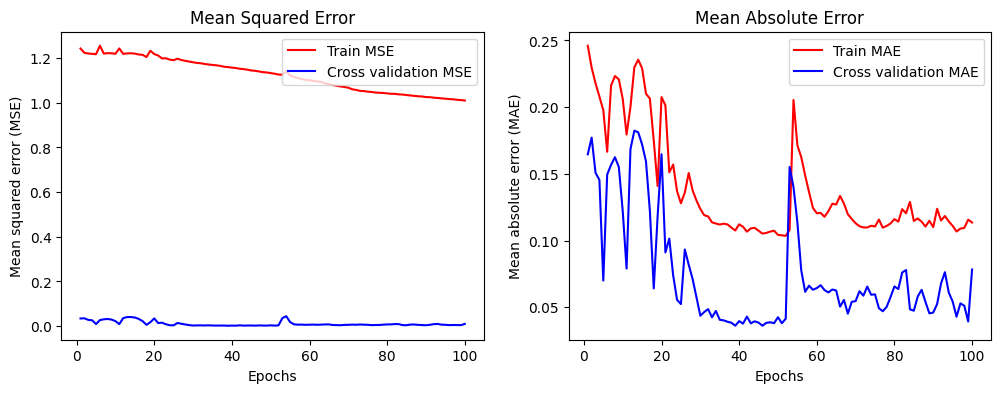

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(np.arange(1, epochs+1), history.history["mean_squared_error"], color="red", label="Train MSE")
ax1.plot(np.arange(1, epochs+1), history.history["val_mean_squared_error"], color="blue", label="Cross validation MSE")
ax2.plot(np.arange(1, epochs+1), history.history["mean_absolute_error"], color="red", label="Train MAE")
ax2.plot(np.arange(1, epochs+1), history.history["val_mean_absolute_error"], color="blue", label="Cross validation MAE")
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Mean squared error (MSE)")
ax1.set_title("Mean Squared Error")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Mean absolute error (MAE)")
ax2.set_title("Mean Absolute Error")
plt.show()

As one can see from plots above, train error is higher than cross validation error. Therefore, we will increase the number of layers to deal with this.

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=num_features),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["mean_squared_error", "mean_absolute_error"])

epochs = 100
history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=epochs)

Epoch 1/100
6/6 [==============================] - 4s 52ms/step - loss: 1.2438 - mean_squared_error: 1.2438 - mean_absolute_error: 0.2589 - val_loss: 0.0297 - val_mean_squared_error: 0.0297 - val_mean_absolute_error: 0.1552
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 1.2293 - mean_squared_error: 1.2293 - mean_absolute_error: 0.2166 - val_loss: 0.0253 - val_mean_squared_error: 0.0253 - val_mean_absolute_error: 0.1423
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 1.2026 - mean_squared_error: 1.2026 - mean_absolute_error: 0.2119 - val_loss: 0.0100 - val_mean_squared_error: 0.0100 - val_mean_absolute_error: 0.0888
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 1.1820 - mean_squared_error: 1.1820 - mean_absolute_error: 0.1887 - val_loss: 0.0034 - val_mean_squared_error: 0.0034 - val_mean_absolute_error: 0.0500
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 1.1462 - mean_squared_error: 1.1

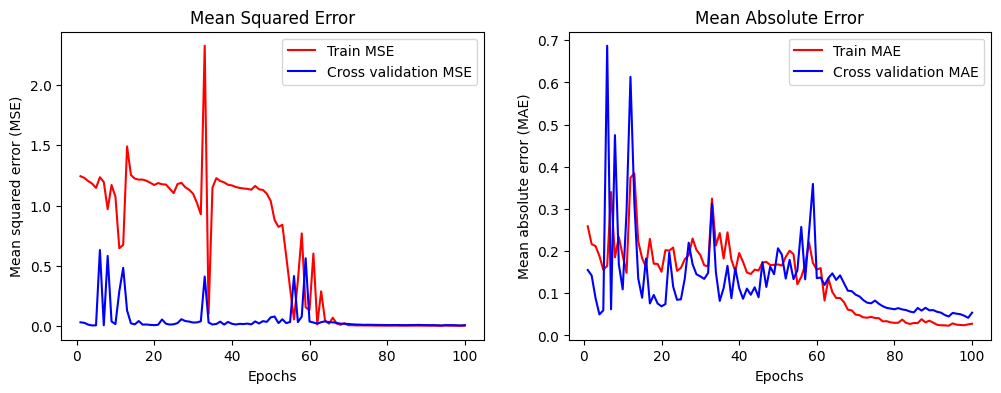

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(np.arange(1, epochs+1), history.history["mean_squared_error"], color="red", label="Train MSE")
ax1.plot(np.arange(1, epochs+1), history.history["val_mean_squared_error"], color="blue", label="Cross validation MSE")
ax2.plot(np.arange(1, epochs+1), history.history["mean_absolute_error"], color="red", label="Train MAE")
ax2.plot(np.arange(1, epochs+1), history.history["val_mean_absolute_error"], color="blue", label="Cross validation MAE")
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Mean squared error (MSE)")
ax1.set_title("Mean Squared Error")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Mean absolute error (MAE)")
ax2.set_title("Mean Absolute Error")
plt.show()

As one can see, there is neither overfitting nor underfitting. Therefore, we do not need regularization. Nevertheless, we can try and see the outcome of regularization.

# Regularization

In [21]:
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 1]
train_mse = []
train_mae = []
cv_mse = []
cv_mae = []

for l in lambdas:
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=num_features),
        tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        tf.keras.layers.Dense(8, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l)),
        tf.keras.layers.Dense(1, activation="linear")
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam(0.01),
                  metrics=["mean_squared_error", "mean_absolute_error"])

    history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=100)

    train_mse.append(history.history["mean_squared_error"][-1])
    train_mae.append(history.history["mean_absolute_error"][-1])
    cv_mse.append(history.history["val_mean_squared_error"][-1])
    cv_mae.append(history.history["val_mean_absolute_error"][-1])

Epoch 1/100
6/6 [==============================] - 2s 73ms/step - loss: 1.2359 - mean_squared_error: 1.2359 - mean_absolute_error: 0.2382 - val_loss: 0.0157 - val_mean_squared_error: 0.0157 - val_mean_absolute_error: 0.1099
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 1.2974 - mean_squared_error: 1.2974 - mean_absolute_error: 0.2038 - val_loss: 0.0195 - val_mean_squared_error: 0.0195 - val_mean_absolute_error: 0.1279
Epoch 3/100
6/6 [==============================] - 0s 20ms/step - loss: 1.2355 - mean_squared_error: 1.2355 - mean_absolute_error: 0.2133 - val_loss: 0.0293 - val_mean_squared_error: 0.0293 - val_mean_absolute_error: 0.1559
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 1.2219 - mean_squared_error: 1.2219 - mean_absolute_error: 0.2187 - val_loss: 0.0328 - val_mean_squared_error: 0.0328 - val_mean_absolute_error: 0.1649
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 1.2259 - mean_squared_error: 1.2

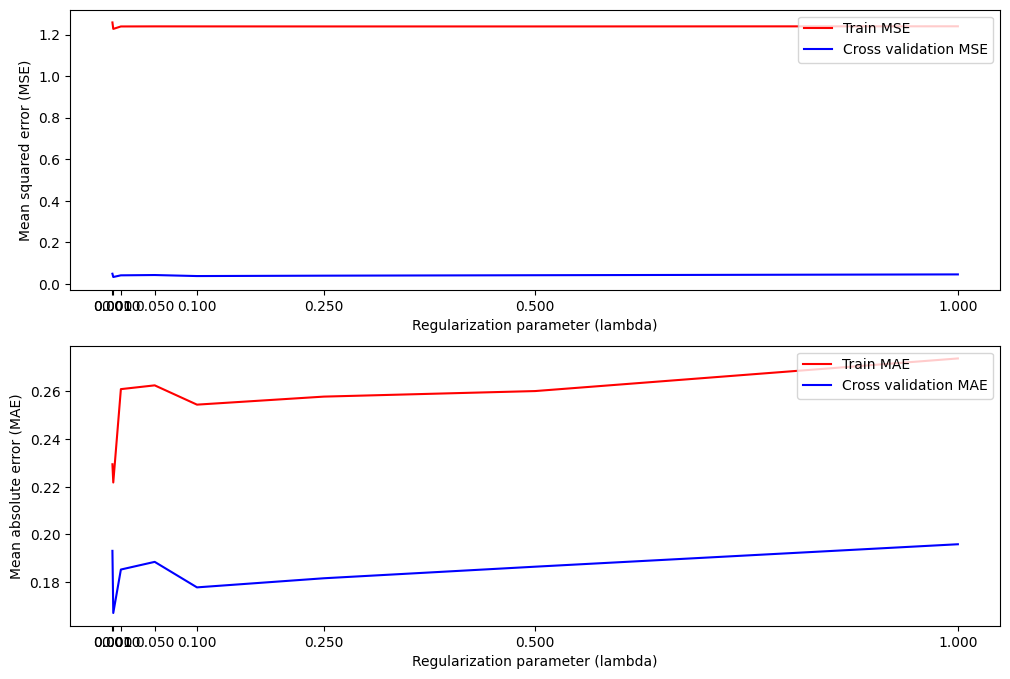

In [22]:
figs, axs = plt.subplots(2,1, figsize=(12,8))
axs[0].plot(lambdas, train_mse, color="red", label="Train MSE")
axs[0].plot(lambdas, cv_mse, color="blue", label="Cross validation MSE")
axs[0].set_xticks(lambdas)
axs[0].legend(loc="upper right")
axs[0].set_xlabel("Regularization parameter (lambda)")
axs[0].set_ylabel("Mean squared error (MSE)")
axs[1].plot(lambdas, train_mae, color="red", label="Train MAE")
axs[1].plot(lambdas, cv_mae, color="blue", label="Cross validation MAE")
axs[1].set_xticks(lambdas)
axs[1].legend(loc="upper right")
axs[1].set_xlabel("Regularization parameter (lambda)")
axs[1].set_ylabel("Mean absolute error (MAE)")
plt.show()

In order to improve visualization, we will draw the plots again with lambda ranging up until 0.1.

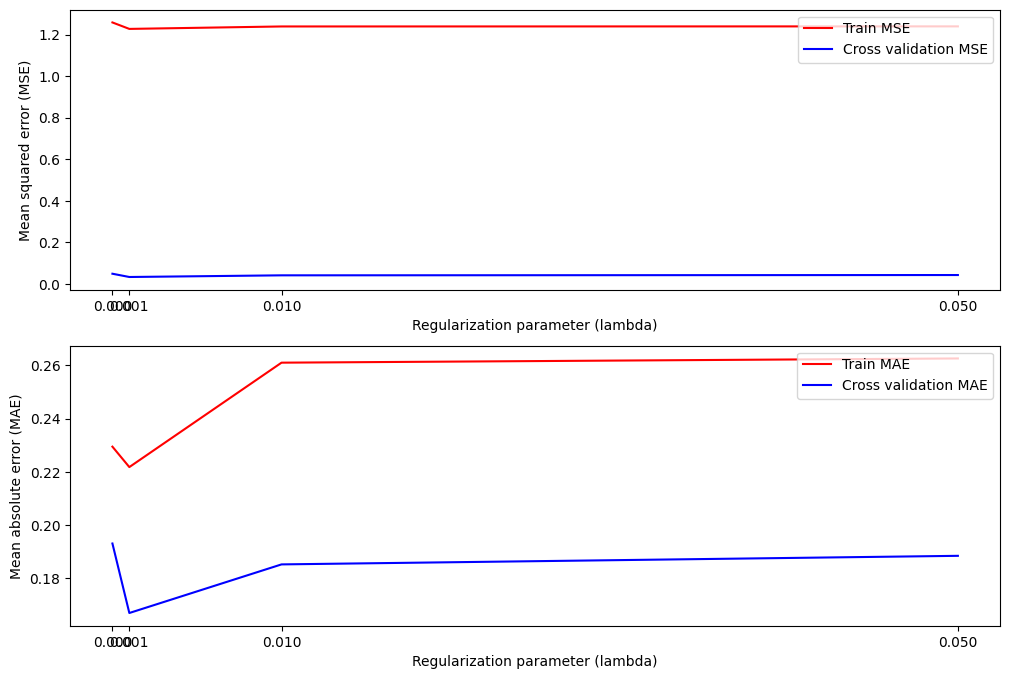

In [23]:
figs, axs = plt.subplots(2,1, figsize=(12,8))
axs[0].plot(lambdas[:4], train_mse[:4], color="red", label="Train MSE")
axs[0].plot(lambdas[:4], cv_mse[:4], color="blue", label="Cross validation MSE")
axs[0].set_xticks(lambdas[:4])
axs[0].legend(loc="upper right")
axs[0].set_xlabel("Regularization parameter (lambda)")
axs[0].set_ylabel("Mean squared error (MSE)")
axs[1].plot(lambdas[:4], train_mae[:4], color="red", label="Train MAE")
axs[1].plot(lambdas[:4], cv_mae[:4], color="blue", label="Cross validation MAE")
axs[1].set_xticks(lambdas[:4])
axs[1].legend(loc="upper right")
axs[1].set_xlabel("Regularization parameter (lambda)")
axs[1].set_ylabel("Mean absolute error (MAE)")
plt.show()

As one can see, cross validation MSE and MAE are the lowest when lambda = 0.001. Thus, we choose lambda = 0.001.

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=num_features),
    tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(8, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["mean_squared_error", "mean_absolute_error"])

history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=100)

Epoch 1/100
6/6 [==============================] - 3s 50ms/step - loss: 1.6277 - mean_squared_error: 1.2708 - mean_absolute_error: 0.2527 - val_loss: 0.2698 - val_mean_squared_error: 0.0463 - val_mean_absolute_error: 0.1959
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 1.4180 - mean_squared_error: 1.2363 - mean_absolute_error: 0.2707 - val_loss: 0.1656 - val_mean_squared_error: 0.0391 - val_mean_absolute_error: 0.1819
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 1.3380 - mean_squared_error: 1.2256 - mean_absolute_error: 0.2382 - val_loss: 0.1245 - val_mean_squared_error: 0.0319 - val_mean_absolute_error: 0.1667
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 1.3102 - mean_squared_error: 1.2262 - mean_absolute_error: 0.2261 - val_loss: 0.0963 - val_mean_squared_error: 0.0266 - val_mean_absolute_error: 0.1513
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 1.2833 - mean_squared_error: 1.2

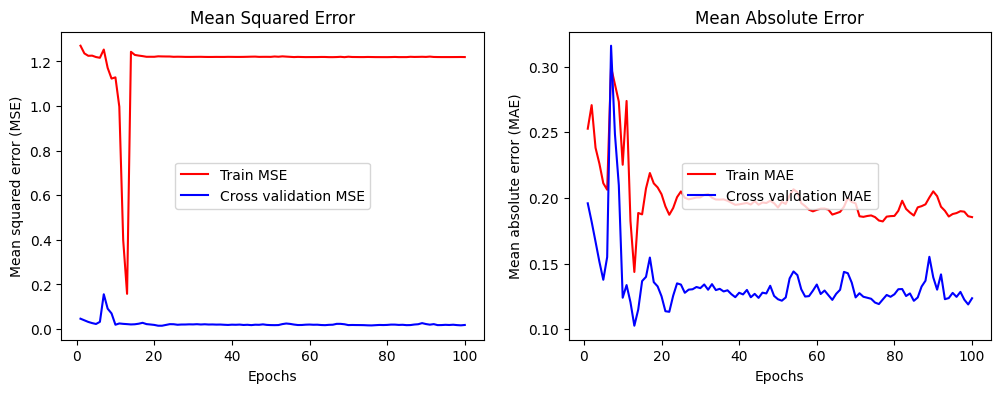

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(np.arange(1, epochs+1), history.history["mean_squared_error"], color="red", label="Train MSE")
ax1.plot(np.arange(1, epochs+1), history.history["val_mean_squared_error"], color="blue", label="Cross validation MSE")
ax2.plot(np.arange(1, epochs+1), history.history["mean_absolute_error"], color="red", label="Train MAE")
ax2.plot(np.arange(1, epochs+1), history.history["val_mean_absolute_error"], color="blue", label="Cross validation MAE")
ax1.legend(loc="center")
ax2.legend(loc="center")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Mean squared error (MSE)")
ax1.set_title("Mean Squared Error")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Mean absolute error (MAE)")
ax2.set_title("Mean Absolute Error")
plt.show()

Apparently, without regularization, we got lower training and cross validation errors. Thus, we will proceed with no regularization.

# Final Model

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=num_features),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["mean_squared_error", "mean_absolute_error"])

epochs = 100
history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=epochs)

Epoch 1/100
6/6 [==============================] - 2s 46ms/step - loss: 1.2829 - mean_squared_error: 1.2829 - mean_absolute_error: 0.2716 - val_loss: 0.0242 - val_mean_squared_error: 0.0242 - val_mean_absolute_error: 0.1418
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 1.2522 - mean_squared_error: 1.2522 - mean_absolute_error: 0.2565 - val_loss: 0.0151 - val_mean_squared_error: 0.0151 - val_mean_absolute_error: 0.0849
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 1.2680 - mean_squared_error: 1.2680 - mean_absolute_error: 0.1949 - val_loss: 0.2403 - val_mean_squared_error: 0.2403 - val_mean_absolute_error: 0.4434
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 1.3116 - mean_squared_error: 1.3116 - mean_absolute_error: 0.4534 - val_loss: 0.0288 - val_mean_squared_error: 0.0288 - val_mean_absolute_error: 0.1566
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 1.2578 - mean_squared_error: 1.2

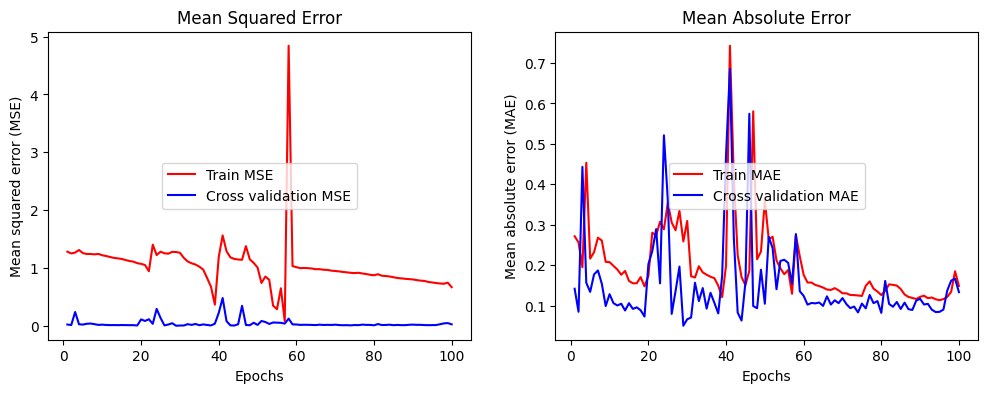

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(np.arange(1, epochs+1), history.history["mean_squared_error"], color="red", label="Train MSE")
ax1.plot(np.arange(1, epochs+1), history.history["val_mean_squared_error"], color="blue", label="Cross validation MSE")
ax2.plot(np.arange(1, epochs+1), history.history["mean_absolute_error"], color="red", label="Train MAE")
ax2.plot(np.arange(1, epochs+1), history.history["val_mean_absolute_error"], color="blue", label="Cross validation MAE")
ax1.legend(loc="center")
ax2.legend(loc="center")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Mean squared error (MSE)")
ax1.set_title("Mean Squared Error")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Mean absolute error (MAE)")
ax2.set_title("Mean Absolute Error")
plt.show()

# Testing

In [31]:
yhat_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, yhat_test)
mae_test = mean_absolute_error(y_test, yhat_test)

print(f"Test accuracy (MSE): {100-mse_test:.3f}%.")
print(f"Test accuracy (MAE): {100-mae_test:.3f}%.")

1/1 [==============================] - 0s 100ms/step
Test accuracy (MSE): 99.928%.
Test accuracy (MAE): 99.827%.


# Price Prediction of an Arbitrary Car

In [32]:
def predict_price(numerical_data, categorical_data):
    X_numerical = scaler_x.transform(numerical_data).reshape(-1)
    X_categorical = ohe.transform(categorical_data).reshape(-1)

    X = np.concatenate([X_numerical, X_categorical], axis=0).reshape(1, -1)

    scaled_y = model.predict(X)
    y = scaler_y.inverse_transform(scaled_y)

    return y

In [38]:
y = predict_price(numerical_data=np.array([170.0, 3.40, 3.50, 10.0, 180.0, 5800.0, 33.0, 37.0]).reshape(1, -1),
                  categorical_data=np.array(["bmw", "gas", "turbo", "four", "sedan", "rwd", "front", "ohc", "eight", "mpfi"]).reshape(1, -1))

print(f"Price of the car is predicted as {y[0][0]:.2f} dollars.")

1/1 [==============================] - 0s 18ms/step
Price of the car is predicted as 74742.63 dollars.


# Saving the Model

In [39]:
model.save("car_price_predictor.keras")